In [23]:
!pip install stable_baselines3
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import numpy as np
import pandas as pd

import gym
import gym_anytrading
import quantstats as qs

from stable_baselines3 import A2C,PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.ppo import MlpPolicy
import matplotlib.pyplot as plt


In [25]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

window_size = 10
start_index = window_size
end_index = len(df)

env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])

In [26]:


model = PPO(MlpPolicy, env, verbose=0)
model.learn(total_timesteps=1000)

In [27]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break


info: {'total_reward': 774.0146160000015, 'total_profit': 0.0005546218711958051, 'position': 1}


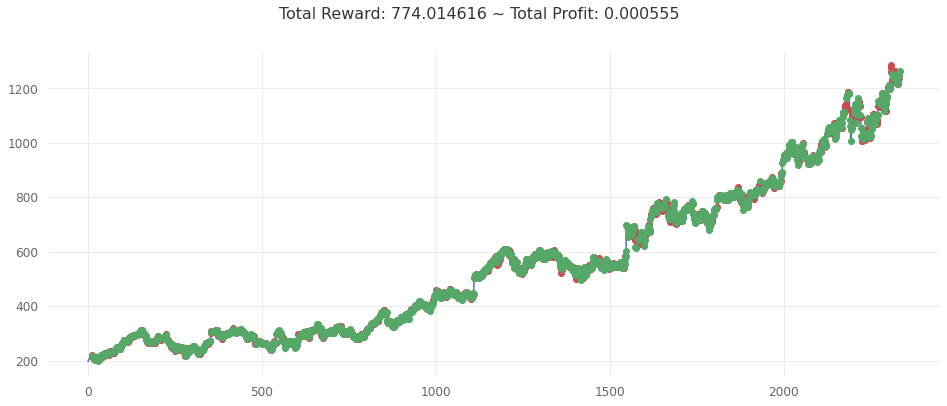

In [28]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2009-06-10
End Period                 2018-08-29
Risk-Free Rate             0.0%
Time in Market             25.0%

Cumulative Return          -99.94%
CAGR﹪                     -55.64%

Sharpe                     -3.8
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -3.59
Sortino                    -4.28
Smart Sortino              -4.04
Sortino/√2                 -3.03
Smart Sortino/√2           -2.86
Omega                      0.23

Max Drawdown               -99.94%
Longest DD Days            3366
Volatility (ann.)          20.8%
Calmar                     -0.56
Skew                       -0.24
Kurtosis                   29.83

Expected Daily %           -0.32%
Expected Monthly %         -6.53%
Expected Yearly %          -52.75%
Kelly Criterion            -64.59%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.47%
Expected Shortfall (cVaR)

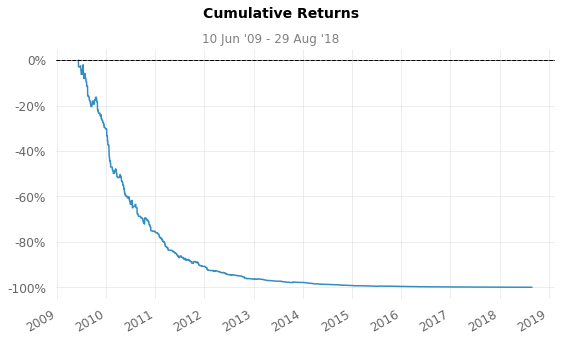

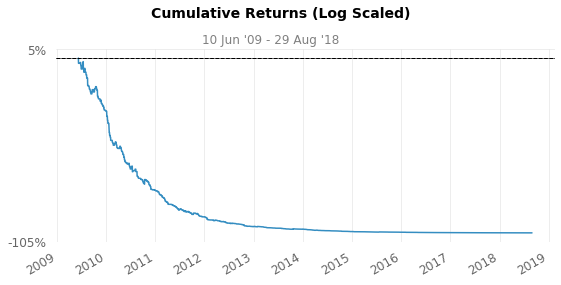

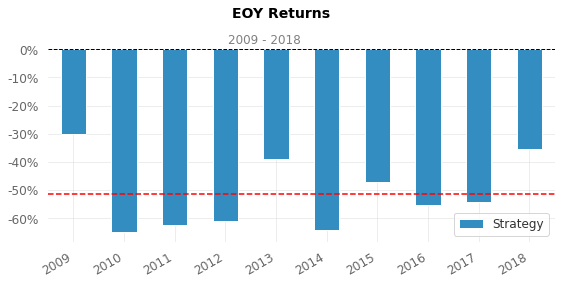

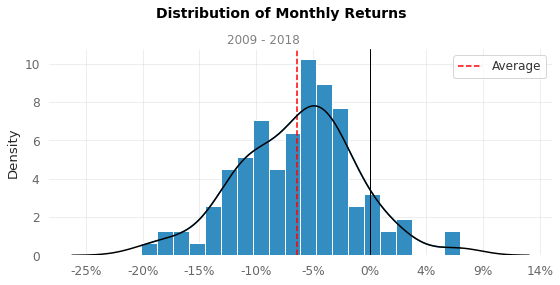

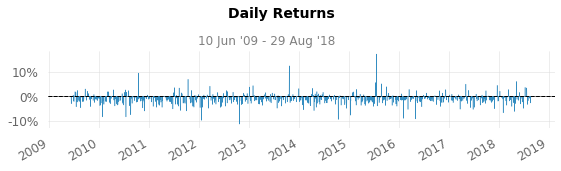

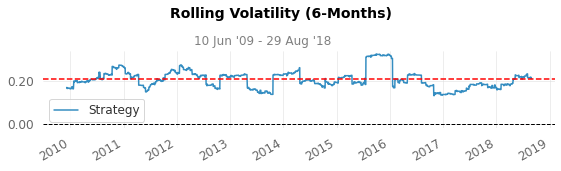

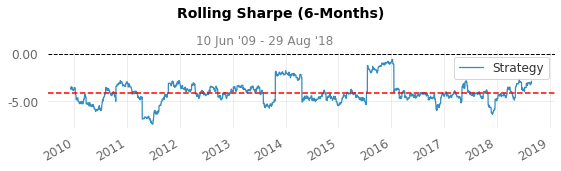

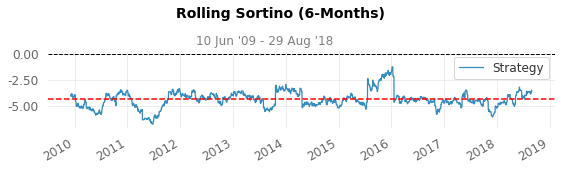

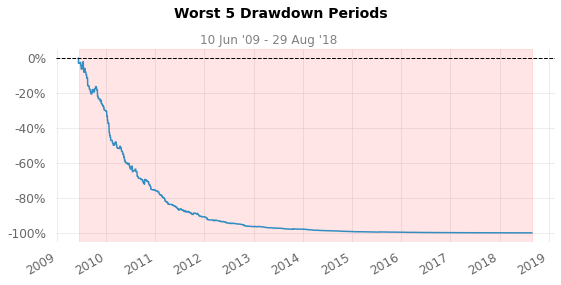

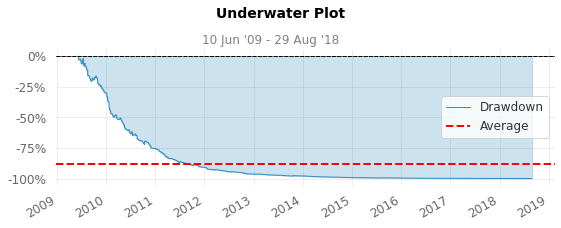

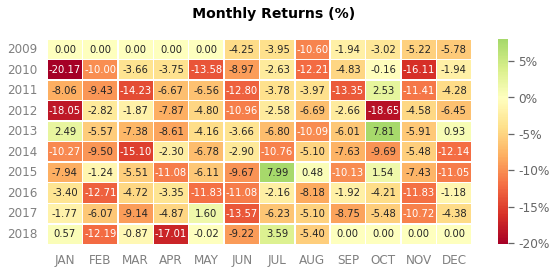

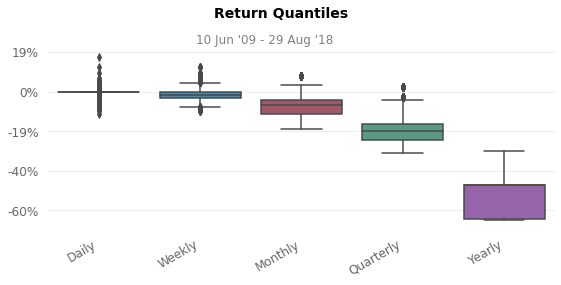

In [29]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)